##  VAR Demo from Statsmodels Documentation
https://www.statsmodels.org/dev/vector_ar.html

- use statsmodels macro dataset
- fix year and quarter in a single pandas friendly column
- take logs first differenced  GDP , Consumption, Investment
- Fit a VAR (2) model 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str

In [2]:
#https://www.statsmodels.org/dev/datasets/generated/macrodata.html
mdata = sm.datasets.macrodata.load_pandas().data
mdata

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


<AxesSubplot: >

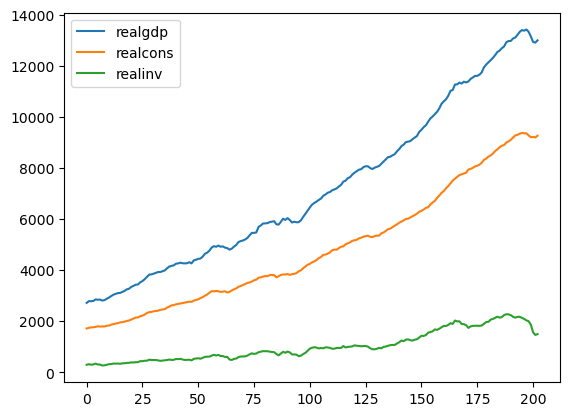

In [3]:
#plot real GDP, real consumption, and real investment
mdata[['realgdp', 'realcons', 'realinv']].plot()


In [4]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)
logdata=np.log(mdata).diff().dropna()
logdata

,realgdp,realcons,realinv
1959-04-01,0.024942,0.015286,0.080213
1959-07-01,-0.001193,0.010386,-0.072131
1959-10-01,0.003495,0.001084,0.034425
1960-01-01,0.022190,0.009534,0.102664
1960-04-01,-0.004685,0.012572,-0.106694
...,...,...,...
2008-07-01,-0.006781,-0.008948,-0.017836
2008-10-01,-0.013805,-0.007843,-0.069165
2009-01-01,-0.016612,0.001511,-0.175598
2009-04-01,-0.001851,-0.002196,-0.067561


<AxesSubplot: >

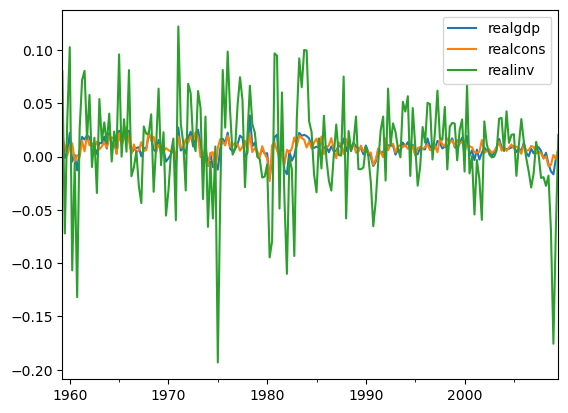

In [5]:
#plot the logged difference data data
logdata.plot()

In [6]:
model = VAR(logdata)
results = model.fit(2) # Here we are specifying the lag order to be 2
results.summary()

/Users/ericvandusen/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 12, Apr, 2023
Time:                     12:23:15
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

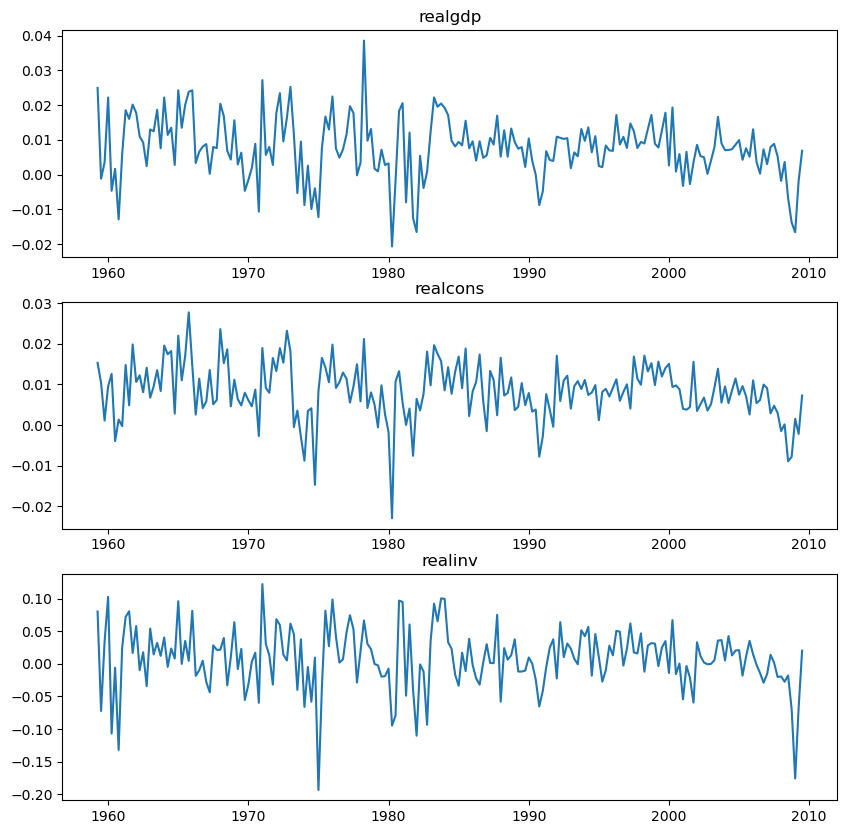

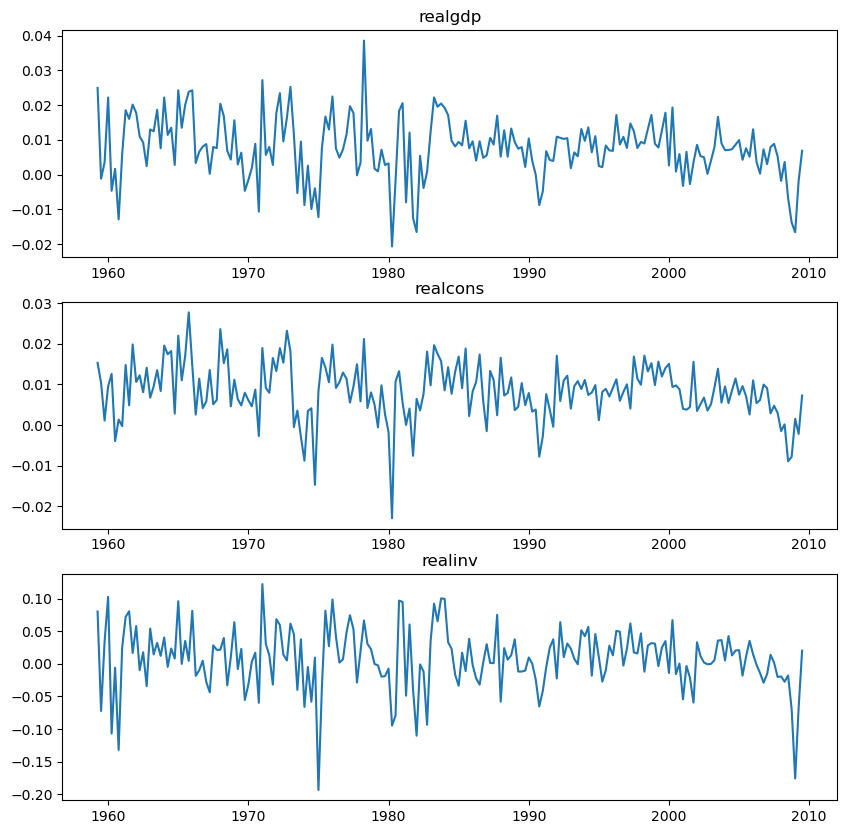

In [7]:
results.plot()

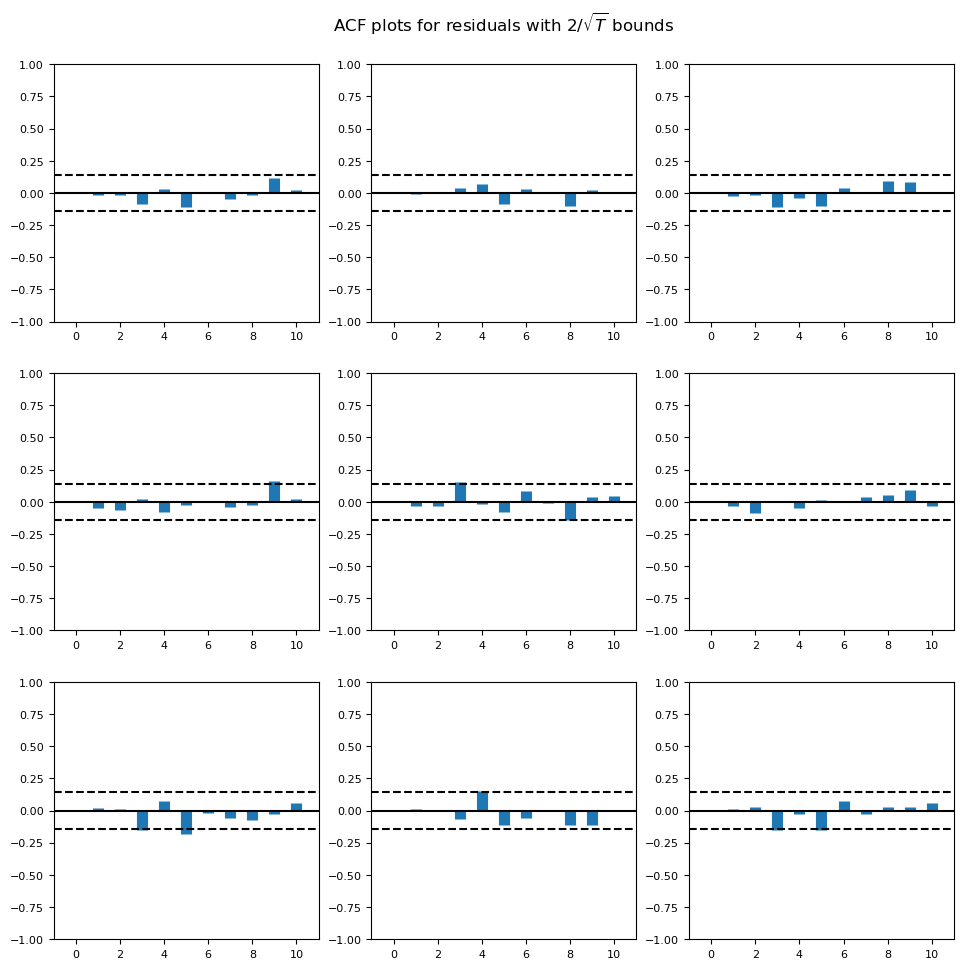

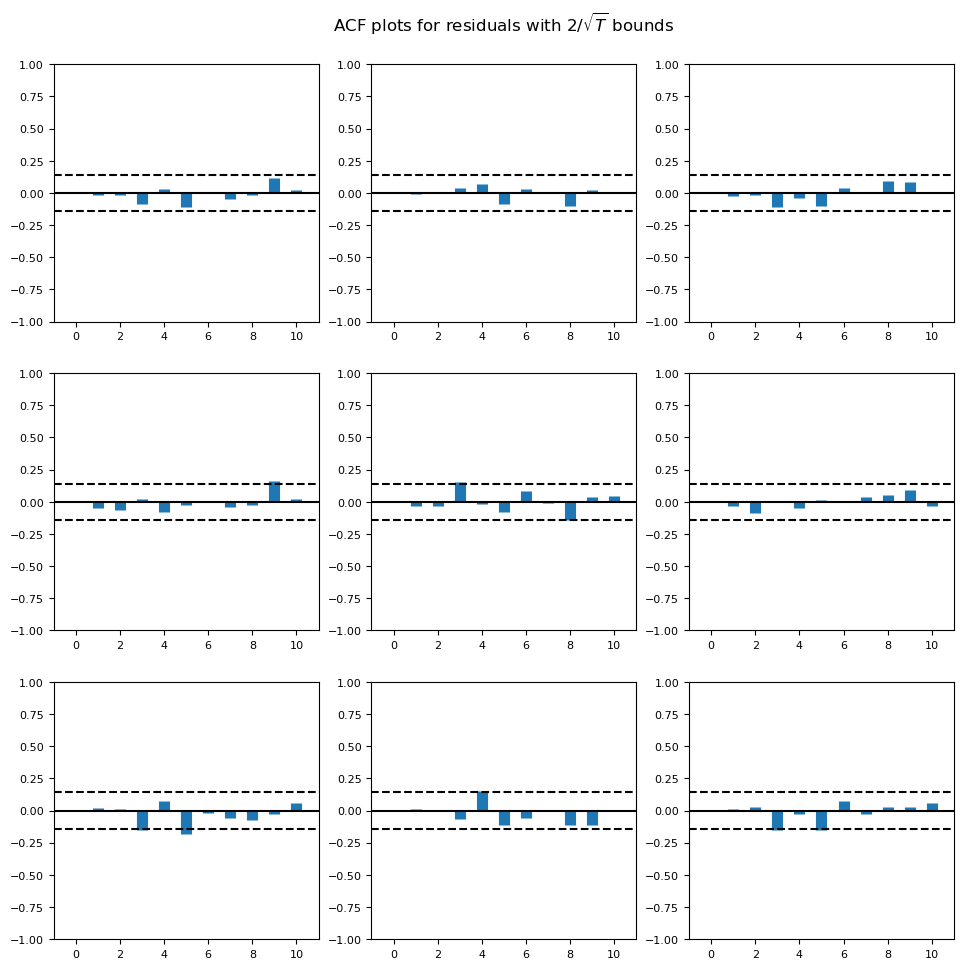

In [8]:
results.plot_acorr()